In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
from scipy import stats


### Problem 1

In [3]:
housingData = pd.read_csv("train.csv")


### Problem 2

### Problem 3

In [4]:
#See what each feature is about. (Numerical data or text data, etc.)
housingData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Check which column is the target variable this time

#The target column of this data set is the SalePrice column

target = housingData.SalePrice

target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [6]:
# Display the mean, standard deviation, and quartiles of the feature values at once

housingData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Problem 4

<Axes: >

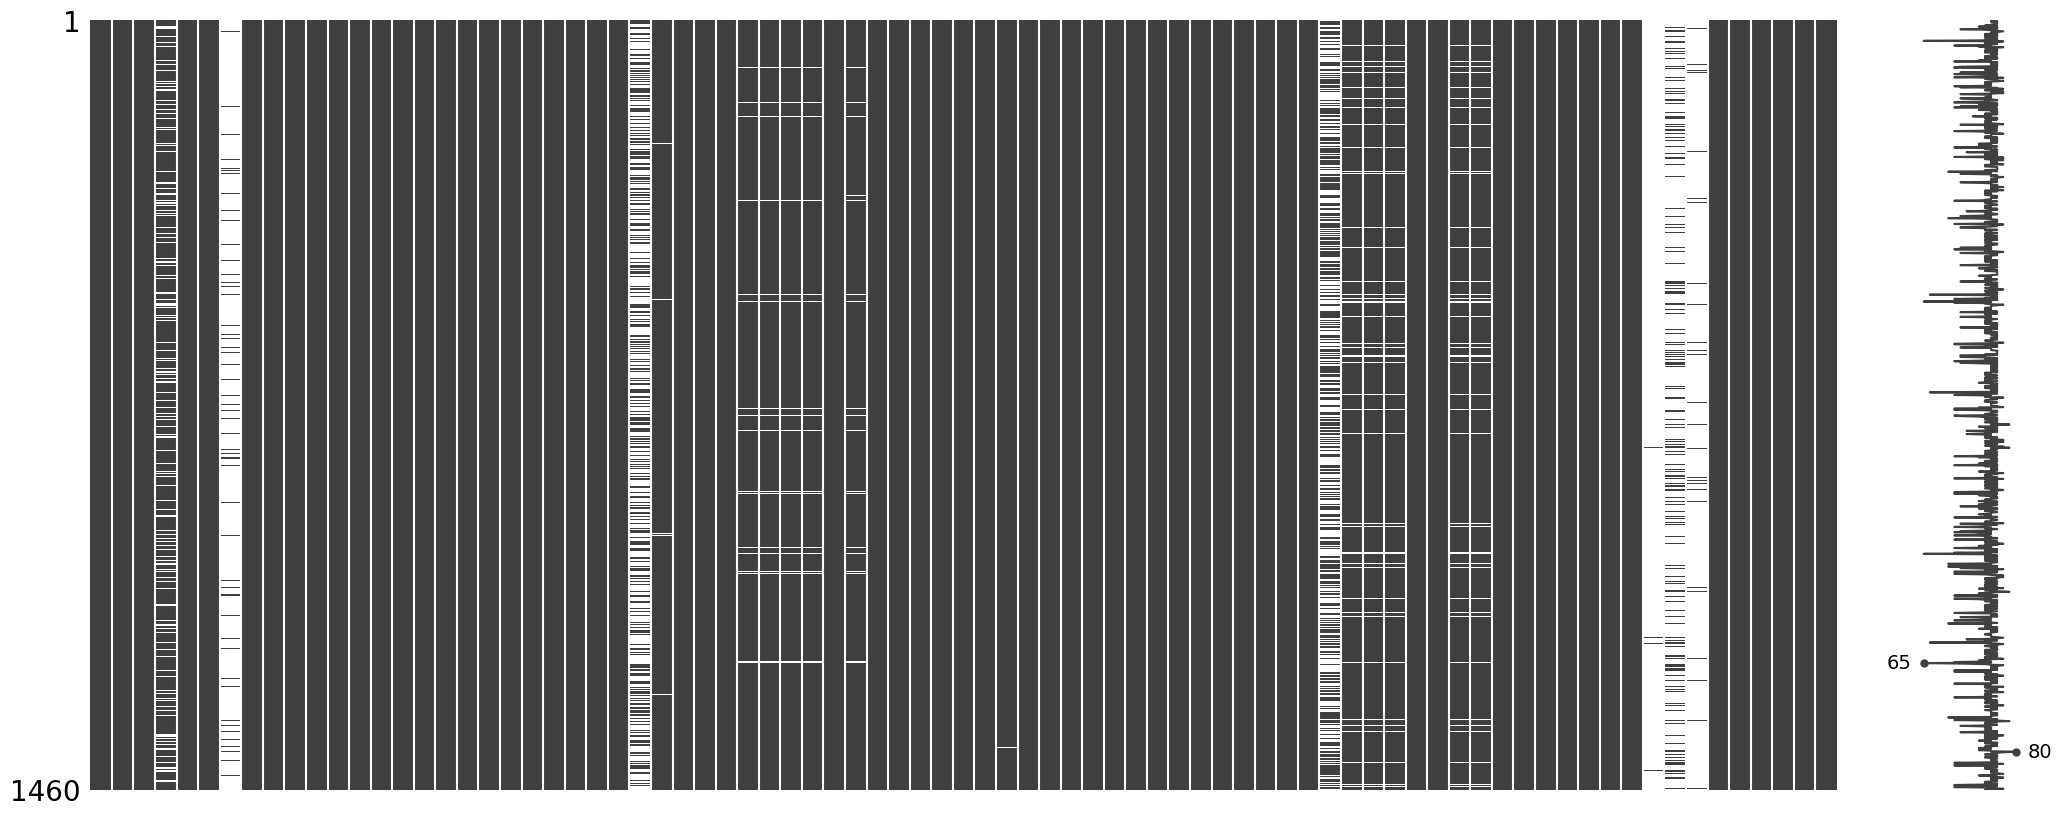

In [7]:
#Check for missing values for each feature.

msn.matrix(housingData)

In [8]:
# Check the percentage of missing values.

missingRatio = housingData.isna().sum() * (1/ len(housingData))

missing = housingData.isna().sum()

missing_val = pd.concat((missing, missingRatio), axis=1)

missing_val.columns = ["Missing", "Missing_Ratio"]

missing_val.tail(50)

,Missing,Missing_Ratio
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinSF1,0,0.000000
BsmtFinType2,38,0.026027
BsmtFinSF2,0,0.000000
BsmtUnfSF,0,0.000000
TotalBsmtSF,0,0.000000
Heating,0,0.000000
HeatingQC,0,0.000000


<Axes: >

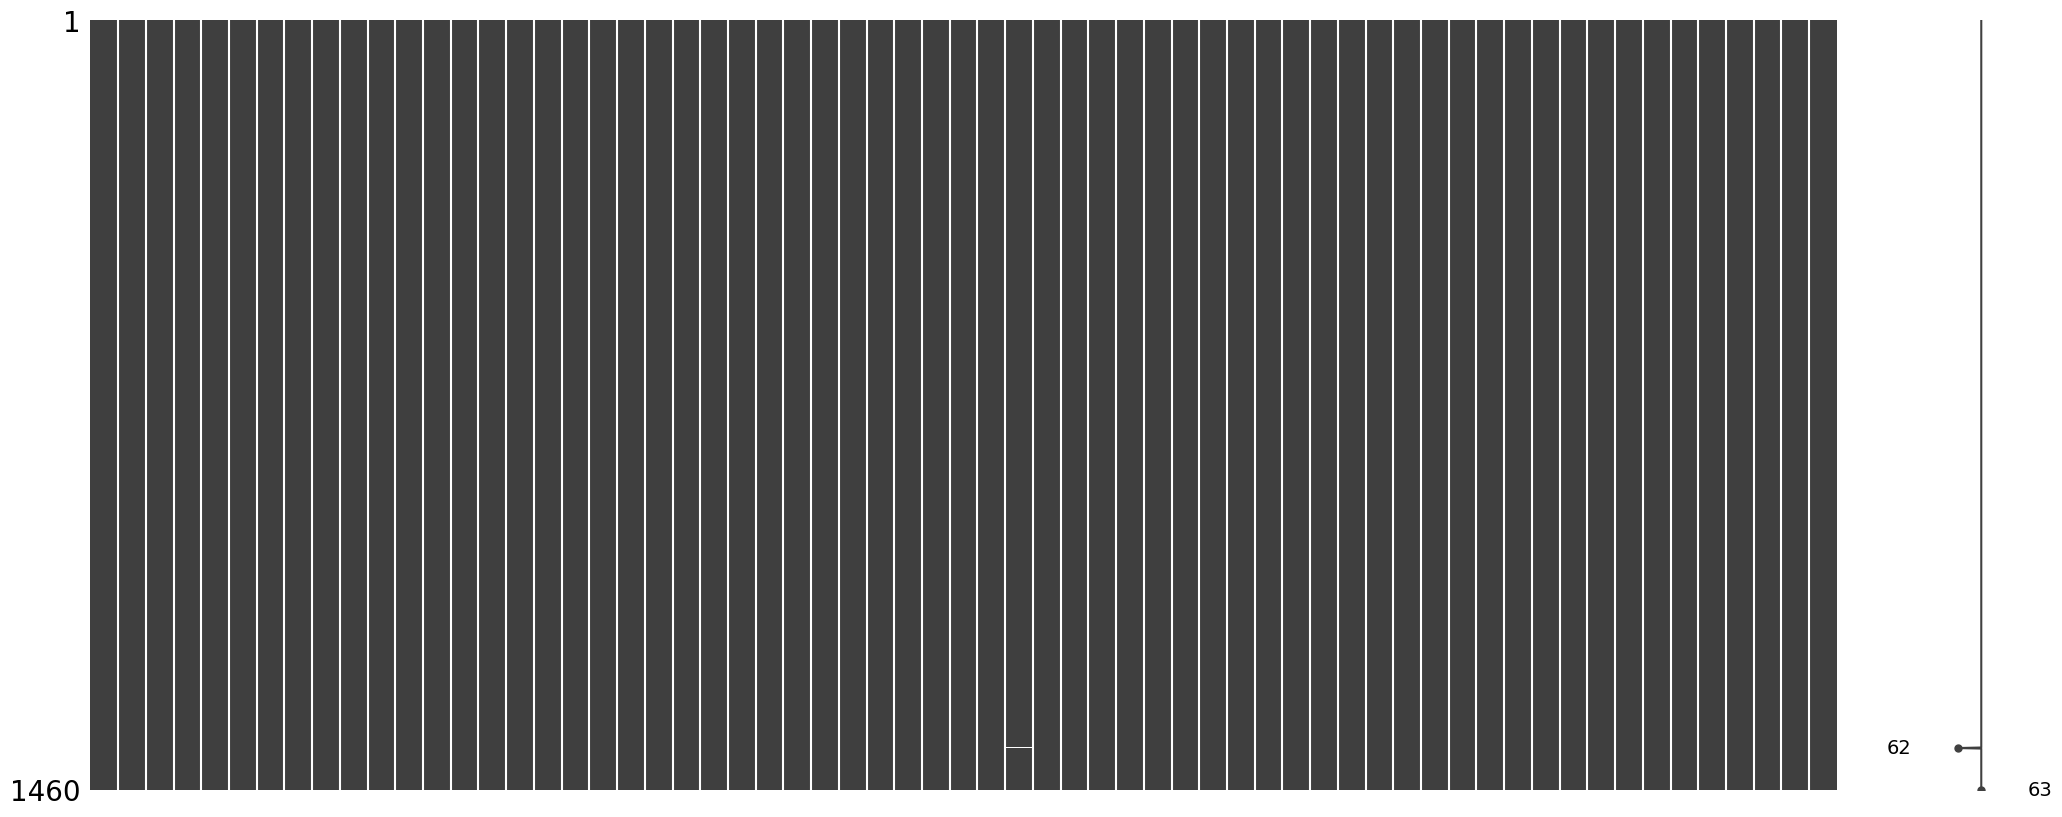

In [9]:
# Delete features (columns) that have 5 or more missing values

dropColumns = missing_val[missing_val["Missing"] >= 5].index


housingData.drop(dropColumns, axis=1, inplace=True)

msn.matrix(housingData)


In [10]:
#Samples (rows) with missing values are deleted from the data from which features with 5 or more missing values have been deleted.

housingData.sample(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1355,1356,80,RL,10192,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Normal,170000
812,813,20,C (all),8712,Grvl,Reg,Bnk,AllPub,Inside,Mod,...,0,0,0,0,54,6,2010,WD,Alloca,55993
1156,1157,80,RL,9350,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,96,0,0,0,10,2008,WD,Normal,179900
275,276,50,RL,7264,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,144,0,0,10,2009,WD,Normal,205000
260,261,80,RL,19296,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,252,0,0,0,0,5,2009,WD,Normal,176000
1147,1148,70,RL,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,174500
1170,1171,80,RL,9880,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,576,0,7,2008,WD,Normal,171000
363,364,160,RM,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,118000
1180,1181,60,RL,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
313,314,20,RL,215245,Pave,IR3,Low,AllPub,Inside,Sev,...,0,0,0,0,0,6,2009,WD,Normal,375000


### Problem 5

#### kurtosis: This is a measure of peakness in a dataset. It measures outliners in a data set 
#### Skewness: This is a measure of asymetry of a dataset from the normal distribution. Skewness measures how much data deviates from the mean. 

### Problem 6

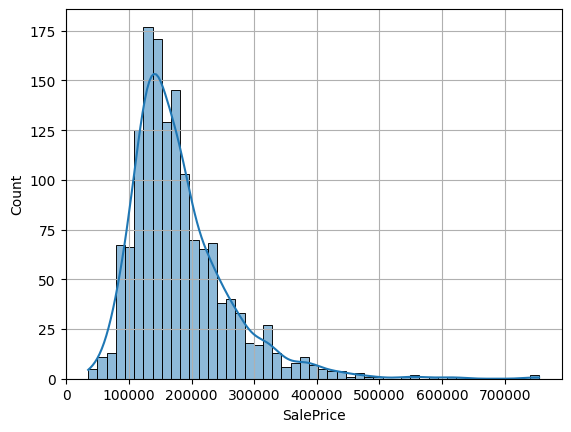

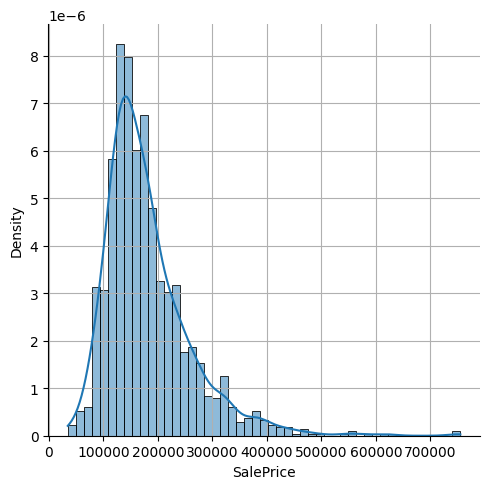

In [11]:

target = housingData.SalePrice
sns.histplot(target, kde=True)

plt.grid(True)
plt.show()

sns.displot(target, kde=True, stat="density")
plt.grid(True)
plt.show()

In [12]:
# calculate "kurtosis" and "skewness"

kurtosis = stats.kurtosis(target, bias=True)

skewness = stats.skew(target, bias=True)

print(f"Kurtosis: {round(kurtosis, 2)} \n", f"\rSkewness: {round(skewness, 2)}")



Kurtosis: 6.51 
Skewness: 1.88


##### The target data is leptokurtic becuase its kurtosis is greater than 3. This means that the data produces more extreme values than the normal distribution. 

#### The target value is positively skewed because skewness > 1, the tail of the distribution is on the right.  Becuase the data has a skewness of 1.88 it indicates that the data is highly skewed. 

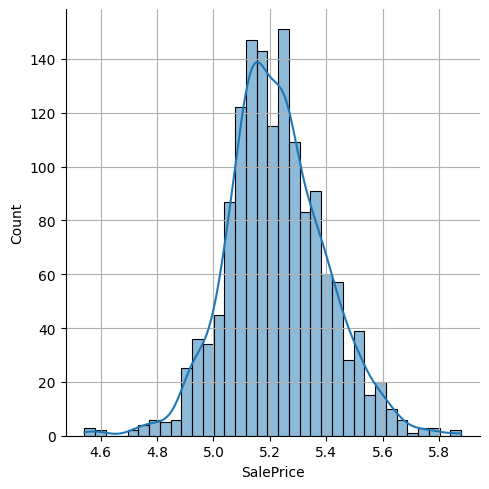

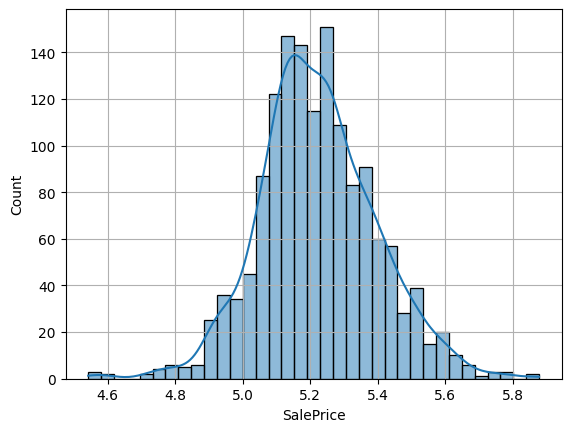

In [13]:
#Perform a logarithmic transformation on the objective variable

target = target.apply(np.log10)

sns.displot(target, kde=True)
plt.grid(True)
plt.show()

sns.histplot(target, kde=True)
plt.grid(True)
plt.show()

In [14]:
kurtosis = stats.kurtosis(target)

skewness = stats.skew(target)

print(f"Kurtosis: {round(kurtosis, 2)} \n", f"\rSkewness: {round(skewness, 2)}")


Kurtosis: 0.8 
Skewness: 0.12


##### By transforming the distribution to its logarithmic version, we have normalized the data. Making it closer to a normal distribution. 

##### The target data is playkurtic, this is becuase it's kurtosis is less than 3. This means that the distribution has fewer outliners than the normal distribution. 

#### The target value is positively skewed because skewness > 0, the tail of the distribution is on the right. A skewness value of 0.12 implies that the data is moderately skewed to the left. 

### Problem 7

In [15]:
housingData.corr()

ValueError: could not convert string to float: 'RL'